Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5047 - val_loss: 0.9198
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4652 - val_loss: 1.0956
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4510 - val_loss: 1.2289
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4489 - val_loss: 1.3766
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4603 - val_loss: 1.4471
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4183 - val_loss: 1.5295
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4550 - val_loss: 1.5575
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4325 - val_loss: 1.6299
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4257 - val_loss: 1.6255
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4302 - val_loss: 1.6785
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3918 - val_loss: 1.7026
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4

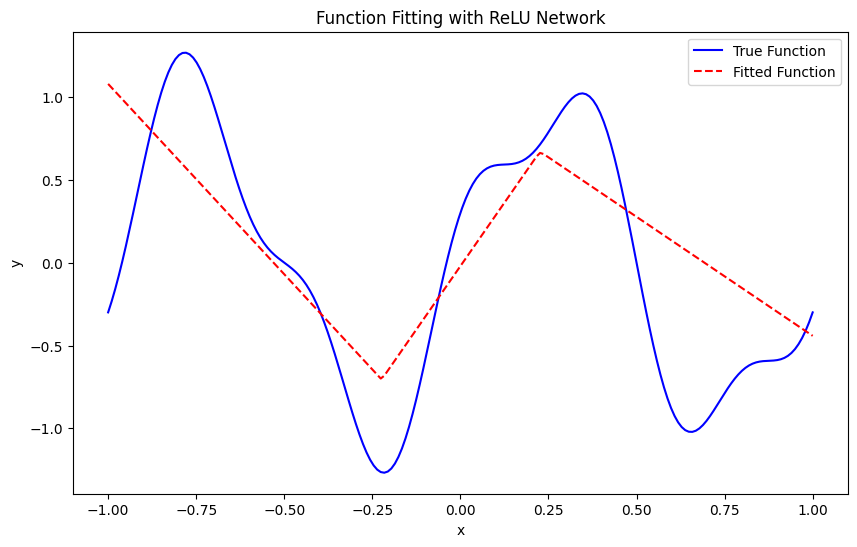

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 定义目标函数
def target_function(x):
    return np.sin(2 * np.pi * x) + 0.3 * np.cos(5 * np.pi * x)

# 生成数据集
def generate_data(n_samples=1000, noise=0.05):
    x = np.linspace(-1, 1, n_samples)
    y = target_function(x) + noise * np.random.normal(size=n_samples)
    return x, y

# 生成训练集和测试集
x_train, y_train = generate_data(n_samples=1000, noise=0.05)
x_test, y_test = generate_data(n_samples=200, noise=0.0)

# 构建模型
model = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)),  # 隐藏层：10 个神经元
    layers.Dense(1)  # 输出层：1 个神经元
])

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 在测试集上预测
y_pred = model.predict(x_test)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='True Function', color='blue')
plt.plot(x_test, y_pred, label='Fitted Function', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Fitting with ReLU Network')
plt.legend()
plt.show()